Importando as bibliotecas:

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras import regularizers
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Importando o dataset:

In [21]:
diabetes_dataset = load_diabetes()
print(diabetes_dataset["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

Tratando o dataset:

In [22]:
# Definindo as entreadas e os resultados
data = diabetes_dataset["data"]
targets = diabetes_dataset["target"]

In [23]:
# Normalizando os dados (Esse procedimento torna as curvas de treinamento mais claras)
targets = (targets - targets.mean(axis=0)) / targets.std()

In [24]:
# Separando o dataset em treinamento e teste
train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.1)

Definindo o modelo:

In [25]:
def get_regularised_model(wd, rate): # wd = Weight Decay;
  model = Sequential([
      Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu', input_shape=(train_data.shape[1],)),
      Dropout(rate),
      Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
      Dropout(rate),
      Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
      Dropout(rate),
      Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
      Dropout(rate),
      Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
      Dropout(rate),
      Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
      Dense(1)
  ])
  return model

In [26]:
# Criando o modelo
model = get_regularised_model(1e-5, 0.3)

In [27]:
# Complicando o modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [29]:
# Treinando o modelo:
history = model.fit(train_data, train_targets, epochs=100,
                    validation_split=0.15, batch_size=64, verbose=False)

In [31]:
# Avaliando o modelo:
model.evaluate(test_data, test_targets, verbose=2)

2/2 - 0s - loss: 0.3802 - mae: 0.4815 - 45ms/epoch - 22ms/step


[0.38018137216567993, 0.48145294189453125]

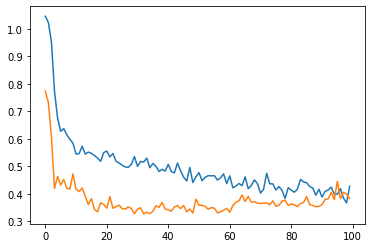

In [33]:
# Plotando a perda de treino e validação
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()